# Parcial: Construcción e implementación de , Random Forest 

En este parcial podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de  Random Forest. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este parcial se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#librerias
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [3]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,0,0,0,1,0,0,0
11,13995,2014,39972,0,0,0,0,1,0,0
167,17941,2016,18989,0,0,0,0,0,1,0
225,12493,2014,51330,0,0,0,1,0,0,0
270,7994,2007,116065,0,1,0,0,0,0,0


In [4]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [5]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 0 - exploracion y analisis de datos 
Los estudiantes deben analizar cuidadosamente los datos del conjunto dataTrain_carListings, identificando posibles valores nulos o inconsistencias. En caso de encontrar datos faltantes, deberán aplicar técnicas de imputación adecuadas para completar la información de manera coherente. Posteriormente, se espera que realicen una exploración visual mediante gráficos que permitan comprender la distribución y las relaciones entre las variables principales.

Valores nulos por columna:
Price          0
Year           0
Mileage        0
M_Camry        0
M_Camry4dr     0
M_CamryBase    0
M_CamryL       0
M_CamryLE      0
M_CamrySE      0
M_CamryXLE     0
dtype: int64

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 10495 entries, 7 to 399976
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Price        10495 non-null  int64
 1   Year         10495 non-null  int64
 2   Mileage      10495 non-null  int64
 3   M_Camry      10495 non-null  bool 
 4   M_Camry4dr   10495 non-null  bool 
 5   M_CamryBase  10495 non-null  bool 
 6   M_CamryL     10495 non-null  bool 
 7   M_CamryLE    10495 non-null  bool 
 8   M_CamrySE    10495 non-null  bool 
 9   M_CamryXLE   10495 non-null  bool 
dtypes: bool(7), int64(3)
memory usage: 399.7 KB
None

Estadísticas descriptivas:
              Price          Year        Mileage
count  10495.000000  10495.000000   10495.000000

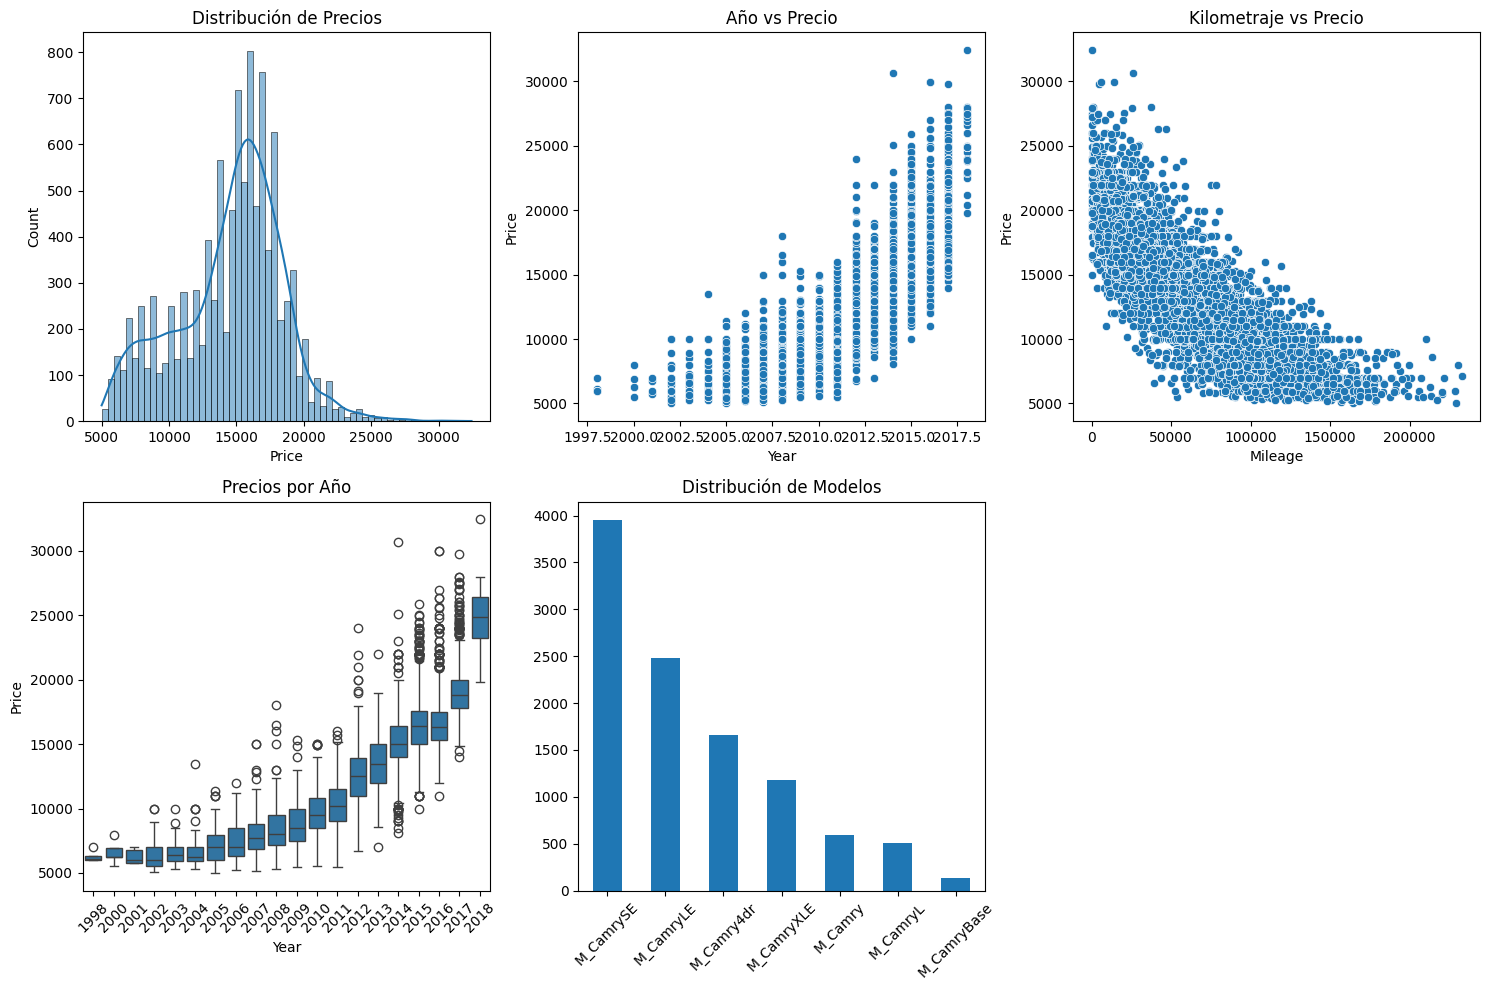

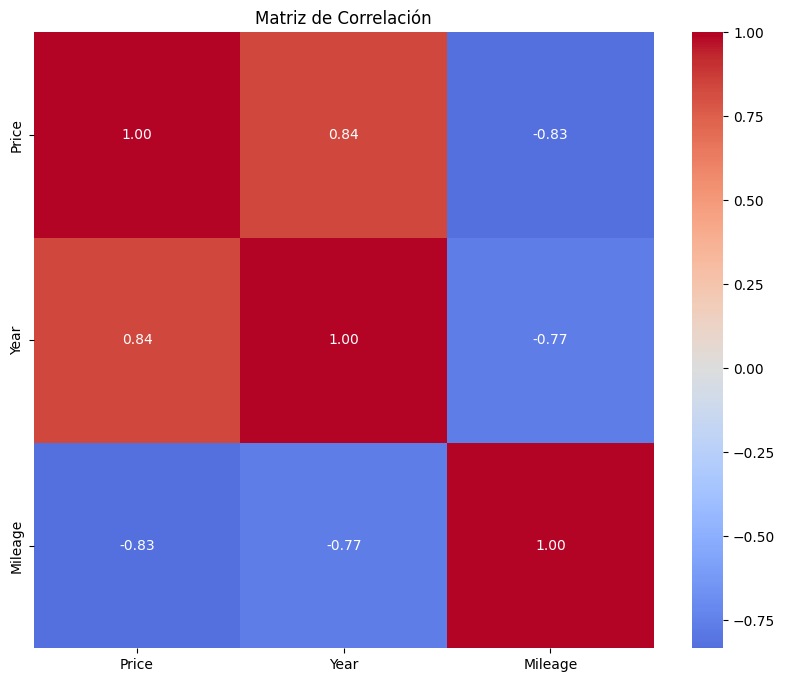

In [ ]:
# celda 0 - exploracion y analisis de datos

# Celda 0 - Exploración y análisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')


data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

print("Valores nulos por columna:")
print(data.isnull().sum())

print("\nInformación del dataset:")
print(data.info())


print("\nEstadísticas descriptivas:")
print(data.describe())


plt.figure(figsize=(15, 10))


plt.subplot(2, 3, 1)
sns.histplot(data['Price'], kde=True)
plt.title('Distribución de Precios')


plt.subplot(2, 3, 2)
sns.scatterplot(data=data, x='Year', y='Price')
plt.title('Año vs Precio')


plt.subplot(2, 3, 3)
sns.scatterplot(data=data, x='Mileage', y='Price')
plt.title('Kilometraje vs Precio')


plt.subplot(2, 3, 4)
sns.boxplot(data=data, x='Year', y='Price')
plt.title('Precios por Año')
plt.xticks(rotation=45)


plt.subplot(2, 3, 5)
model_cols = [col for col in data.columns if col.startswith('M_')]
model_counts = data[model_cols].sum().sort_values(ascending=False)
model_counts.plot(kind='bar')
plt.title('Distribución de Modelos')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 8))
numeric_cols = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


### Punto 1 - Random forest con librería

En la celda 1, usando la librería sklearn entrenen un modelo de Randon Forest para regresion  y comenten sobre el desempeño del modelo.

In [17]:
# Celda 1

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y = data['Price']
X = data.drop(['Price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Desempeño del modelo RF:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f} %")

Desempeño del modelo RF:
Mean Squared Error: 3116678.92
R² Score: 0.796
Mean Absolute Error (MAE): 1314.42
Mean Absolute Percentage Error (MAPE): 9.55 %


### Punto 2 - Calibración de parámetros Random forest

En la celda 2, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresion, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
95 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\User

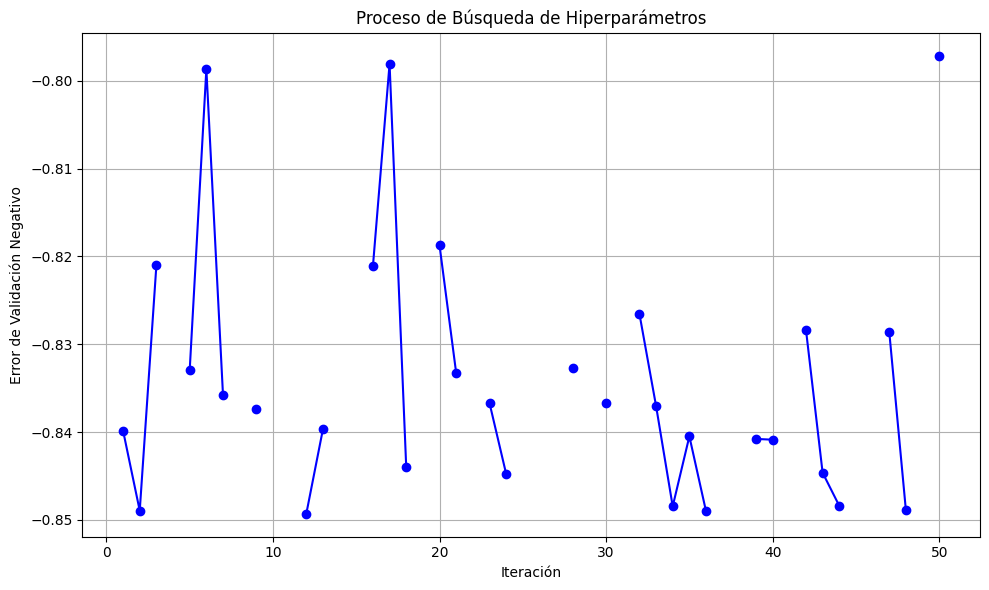


Mejores puntajes durante la búsqueda:
Top 5 mejores scores: [-0.79714229 -0.79806593 -0.79865502 -0.81874012 -0.82099362]


In [ ]:
# Celda 2 - Calibración de parámetros (Parte 1)
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'n_estimators': [10, 50, 100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)


random_search.fit(X_train, y_train)


plt.figure(figsize=(10, 6))
results = pd.DataFrame(random_search.cv_results_)
plt.plot(range(1, len(results) + 1), -results['mean_test_score'], 'bo-')
plt.xlabel('Iteración')
plt.ylabel('Error de Validación Negativo')
plt.title('Proceso de Búsqueda de Hiperparámetros')
plt.grid(True)
plt.tight_layout()
plt.show()


print("\nMejores puntajes durante la búsqueda:")
top_scores = -results['mean_test_score'].sort_values()[:5]
print(f"Top 5 mejores scores: {top_scores.values}")

In [ ]:
#Encontrar los mejores hiperparametros: 


print("Mejores Hiperparámetros:")
print(random_search.best_params_)

best_rf = random_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
mape_best = np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100

print("Desempeño del modelo RF calibrado:")
print(f"Mean Squared Error: {mse_best:.2f}")
print(f"R² Score: {r2_best:.3f}")
print(f"Mean Absolute Error (MAE): {mae_best:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_best:.2f} %")




Mejores Hiperparámetros:
{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
Desempeño del modelo RF calibrado:
Mean Squared Error: 2411920.45
R² Score: 0.842
Mean Absolute Error (MAE): 1140.84
Mean Absolute Percentage Error (MAPE): 8.33 %


Importancia de los predictores:
       Feature  Importance
0         Year    0.448241
1      Mileage    0.424250
3   M_Camry4dr    0.066602
7    M_CamrySE    0.022088
8   M_CamryXLE    0.019215
6    M_CamryLE    0.007427
2      M_Camry    0.006767
4  M_CamryBase    0.002741
5     M_CamryL    0.002669


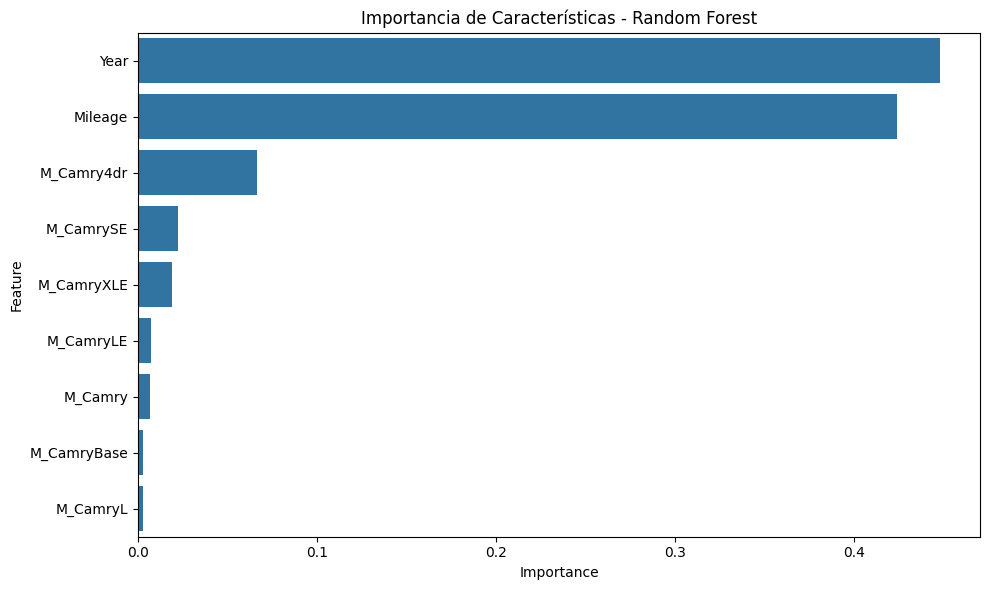

In [ ]:
#Importancia de los predictores


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("Importancia de los predictores:")
print(feature_importance)


plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Importancia de Características - Random Forest')
plt.tight_layout()
plt.show()

### Punto 3 - análisis de resultados, gracias y conclusiones
En la celda 3

Comparación de Modelos:
         Modelo           MSE        R²          MAE      MAPE
0       RF Base  3.116679e+06  0.796244  1314.420708  9.545144
1  RF Calibrado  2.411920e+06  0.842318  1140.841294  8.327426


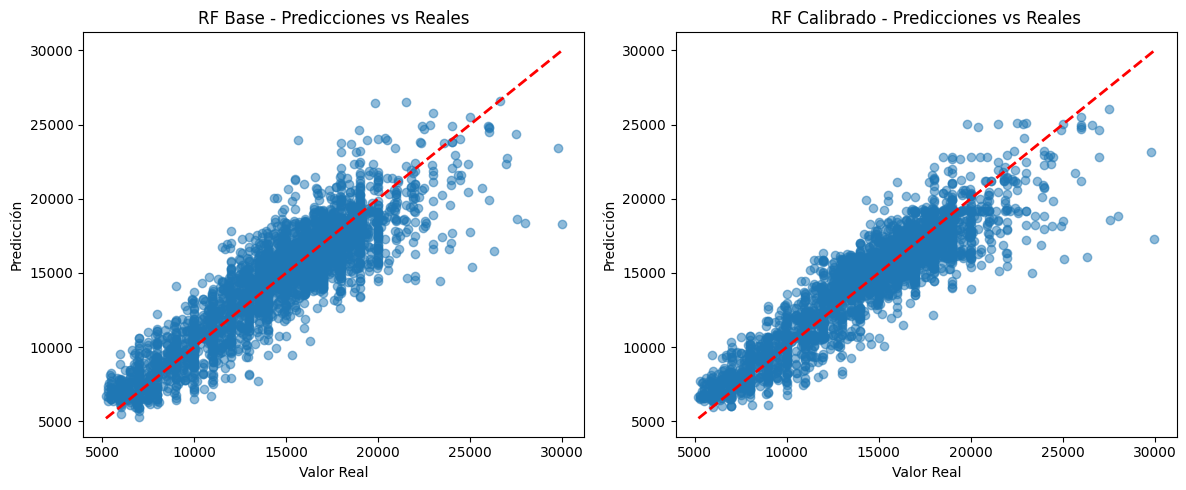

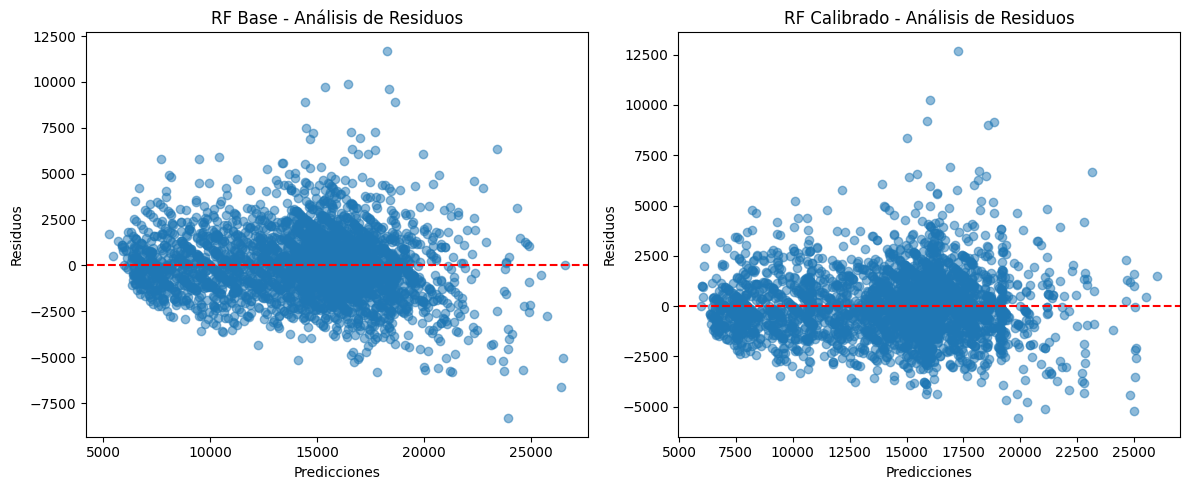


=== CONCLUSIONES ===
1. Mejora del modelo: La calibración mejoró significativamente el desempeño del modelo
   - R² aumentó de 0.796 a 0.842
   - MSE disminuyó de 3116679 a 2411920
   - MAPE mejoró de 9.5% a 8.3%

2. Variables más importantes:
   - Year: 0.448
   - Mileage: 0.424
   - M_Camry4dr: 0.067

3. Efecto de parámetros:
   - n_estimators: 300 (más árboles mejoran performance)
   - max_depth: 10 (controla sobreajuste)
   - max_features: sqrt (diversidad en árboles)


In [ ]:
#celda 3

comparison = pd.DataFrame({
    'Modelo': ['RF Base', 'RF Calibrado'],
    'MSE': [mse, mse_best],
    'R²': [r2, r2_best],
    'MAE': [mae, mae_best],
    'MAPE': [mape, mape_best]
})

print("Comparación de Modelos:")
print(comparison)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('RF Base - Predicciones vs Reales')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('RF Calibrado - Predicciones vs Reales')

plt.tight_layout()
plt.show()


residuals_base = y_test - y_pred
residuals_best = y_test - y_pred_best

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals_base, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('RF Base - Análisis de Residuos')

plt.subplot(1, 2, 2)
plt.scatter(y_pred_best, residuals_best, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('RF Calibrado - Análisis de Residuos')

plt.tight_layout()
plt.show()

print("\n=== CONCLUSIONES ===")
print("1. Mejora del modelo: La calibración mejoró significativamente el desempeño del modelo")
print(f"   - R² aumentó de {r2:.3f} a {r2_best:.3f}")
print(f"   - MSE disminuyó de {mse:.0f} a {mse_best:.0f}")
print(f"   - MAPE mejoró de {mape:.1f}% a {mape_best:.1f}%")

print("\n2. Variables más importantes:")
for i, row in feature_importance.head(3).iterrows():
    print(f"   - {row['Feature']}: {row['Importance']:.3f}")

print("\n3. Efecto de parámetros:")
best_params = random_search.best_params_
print(f"   - n_estimators: {best_params.get('n_estimators')} (más árboles mejoran performance)")
print(f"   - max_depth: {best_params.get('max_depth')} (controla sobreajuste)")
print(f"   - max_features: {best_params.get('max_features')} (diversidad en árboles)")

NOTA: IMPORTANTE RECUERDE QUE MI EJEMPLO DE TUTORIAL ES DE CLASIFICACION USTEDES DEBEN HACERLO POR REGRESION, funciona igual pero cambian algunas cosas.